<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/prodigy_task_2_performing_data_cleaning_and_EDA_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
folder_path = "/content/drive/MyDrive/prodigy task 2/"
gender_submission = pd.read_csv(folder_path + "gender_submission.csv")
test = pd.read_csv(folder_path + "test.csv")
train = pd.read_csv(folder_path + "train.csv")

In [ ]:
# Display basic information about the datasets
print("Gender Submission Info:")
print(gender_submission.info())
print("\nTest Info:")
print(test.info())
print("\nTrain Info:")
print(train.info())

Gender Submission Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes

In [ ]:
# Check for missing values
print("\nMissing Values in Gender Submission:")
print(gender_submission.isnull().sum())
print("\nMissing Values in Test:")
print(test.isnull().sum())
print("\nMissing Values in Train:")
print(train.isnull().sum())


Missing Values in Gender Submission:
PassengerId    0
Survived       0
dtype: int64

Missing Values in Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Values in Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Fill missing values in 'Age' with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [ ]:
# Fill missing value in 'Fare' with the median in the test dataset
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [ ]:
# Drop 'Cabin' column due to a large number of missing values
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Fill missing values in 'Embarked' with the most common value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [ ]:
# Verify that missing values have been handled
print("\nMissing Values in Train after handling:")
print(train.isnull().sum())
print("\nMissing Values in Test after handling:")
print(test.isnull().sum())


Missing Values in Train after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values in Test after handling:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Explore basic statistics
print("\nSummary Statistics for Gender Submission:")
print(gender_submission.describe())
print("\nSummary Statistics for Test:")
print(test.describe())
print("\nSummary Statistics for Train:")
print(train.describe())


Summary Statistics for Gender Submission:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

Summary Statistics for Test:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.599282    0.447368    0.392344   35.576535
std     120.810458    0.841838   12.703770    0.896760    0.981429   55.850103
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.471875
max    1309.0000

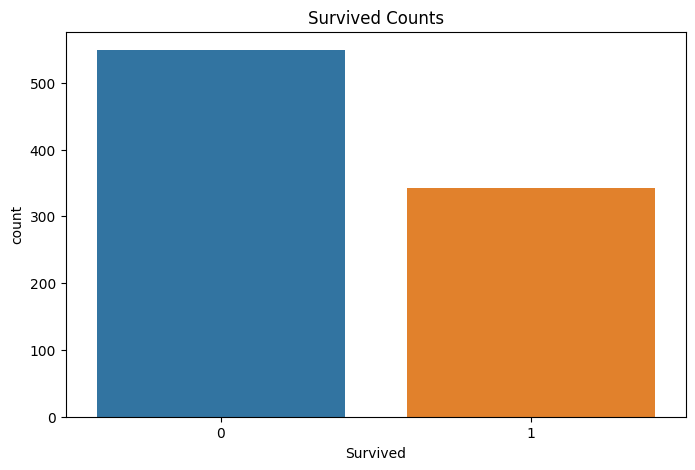

In [ ]:
# Visualize Survived counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train)
plt.title("Survived Counts")
plt.show()

<ipython-input-14-6a8dcc725f56>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.2)


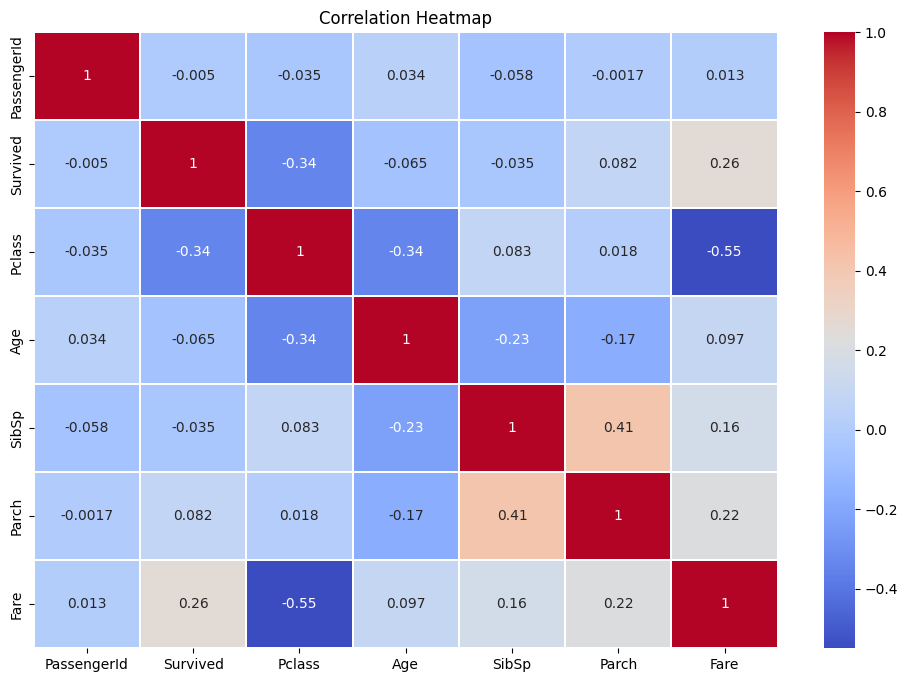

In [ ]:
# Explore relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

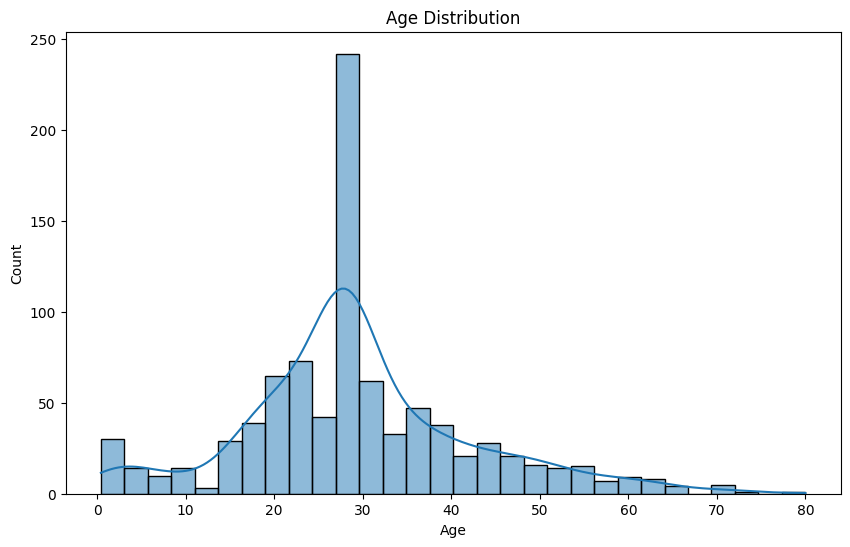

In [ ]:
# Explore Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

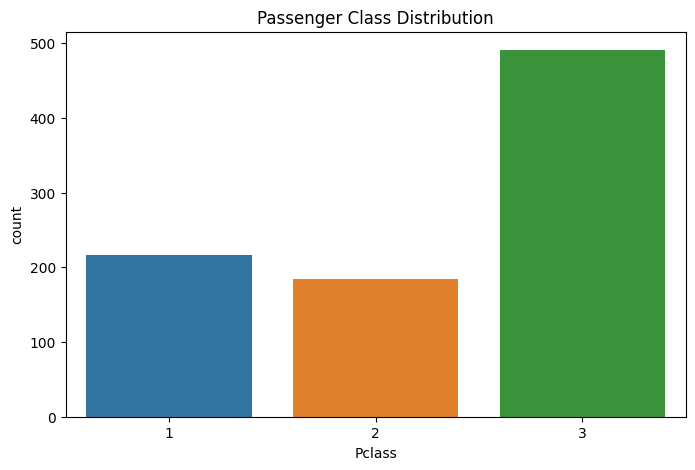

In [ ]:
# Explore Pclass distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train)
plt.title("Passenger Class Distribution")
plt.show()

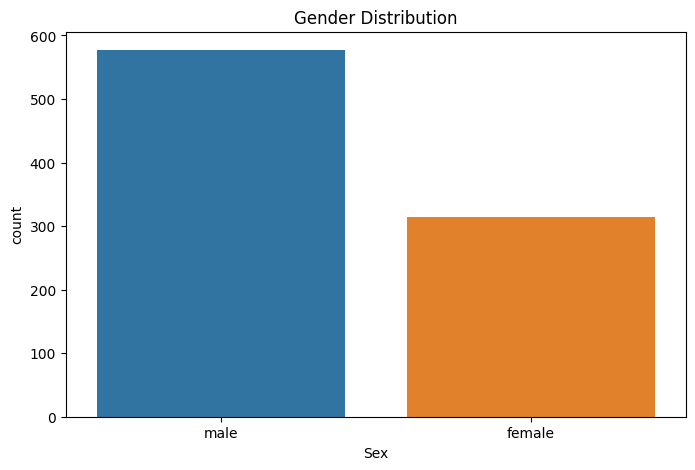

In [ ]:
# Explore Sex distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train)
plt.title("Gender Distribution")
plt.show()

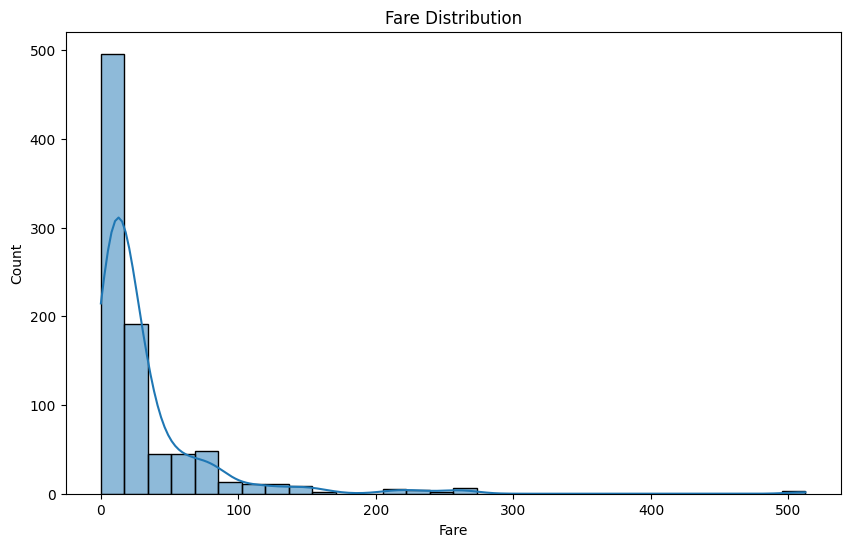

In [ ]:
# Explore the distribution of Fares
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

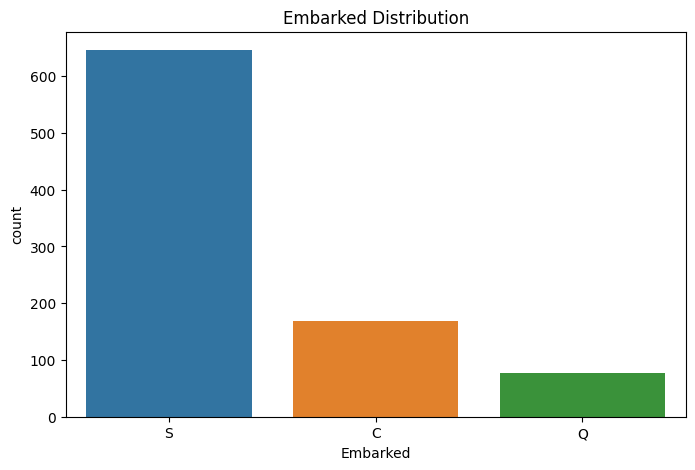

In [ ]:
# Explore the distribution of Embarked
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=train)
plt.title("Embarked Distribution")
plt.show()